In [1]:
from Timed_Petri_Net import  Place, CombinedTransition, PetriNet

# Example 1
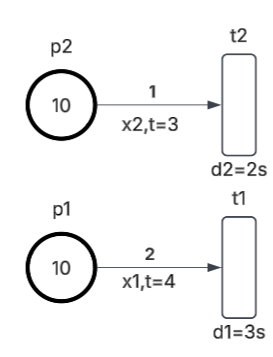

In [2]:

def run_first_example(cp):
    """Run the first example with bursts."""
    # Create places.
    p1 = Place("P1", tokens=10)
    p2 = Place("P2", tokens=10)
    sink1 = Place("Sink1", tokens=0)
    sink2 = Place("Sink2", tokens=0)
     
    # Define transitions.
    t1 = CombinedTransition(
        name="T1",
        input_places={p1: 2},
        output_places={sink1: 2},
        fixed_delay=3.0,
        burst_size=4,
        deterministic=True
    )
     
    t2 = CombinedTransition(
        name="T2",
        input_places={p2: 1},
        output_places={sink2: 1},
        fixed_delay=2.0,
        burst_size=3,
        deterministic=True
    )
     
    net = PetriNet(
        places=[p1, p2, sink1, sink2],
        transitions=[t1, t2]
    )
     
    print("Starting simulation...\n")
    net.simulate(max_time=cp)


In [3]:
print("RUNNING FIRST EXAMPLE")
run_first_example(30)
    

RUNNING FIRST EXAMPLE
Starting simulation...

Scheduled burst event for 'T1' at time 3.000
Scheduled burst event for 'T2' at time 2.000

--- At time 2.000 ---
Transition 'T2' fired.
Place(name='P1', tokens=10)
Place(name='P2', tokens=9)
Place(name='Sink1', tokens=0)
Place(name='Sink2', tokens=1)
Scheduled burst event for 'T2' at time 4.000

--- At time 3.000 ---
Transition 'T1' fired.
Place(name='P1', tokens=8)
Place(name='P2', tokens=9)
Place(name='Sink1', tokens=2)
Place(name='Sink2', tokens=1)
Scheduled burst event for 'T1' at time 6.000

--- At time 4.000 ---
Transition 'T2' fired.
Place(name='P1', tokens=8)
Place(name='P2', tokens=8)
Place(name='Sink1', tokens=2)
Place(name='Sink2', tokens=2)
Scheduled burst event for 'T2' at time 6.000

--- At time 6.000 ---
Transition 'T1' fired.
Place(name='P1', tokens=6)
Place(name='P2', tokens=8)
Place(name='Sink1', tokens=4)
Place(name='Sink2', tokens=2)
Scheduled burst event for 'T1' at time 9.000

--- At time 6.000 ---
Transition 'T2' fire

# Example 2 clock

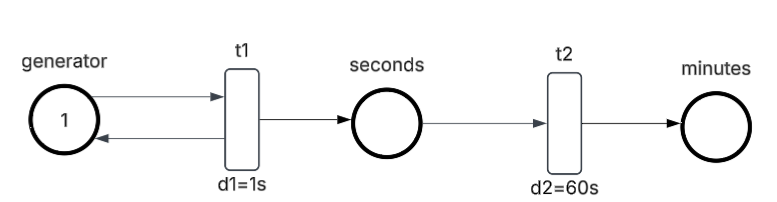

In [4]:

def run_clock_example(cp):
    """Run the clock example with seconds reset."""
    # Create clock register places.
    generator = Place("Generator", tokens=1)
    seconds = Place("Seconds", tokens=0)
    minutes = Place("Minutes", tokens=0)

    # T1: Tick transition, fires every second.
    t1 = CombinedTransition(
        name="T1",
        input_places={generator: 1},          # Requires the Generator token.
        output_places={seconds: 1, generator: 1},  # Increments Seconds and returns the Generator.
        fixed_delay=1.0,
        burst_size=1,                        # Single firing.
        deterministic=True
    )

    # T2: Reset seconds transition - polls every second
    t2 = CombinedTransition(
        name="T2",
        input_places={seconds: 60},           # Requires 60 seconds
        output_places={minutes: 1},           # Adds 1 minute
        fixed_delay=1.0,                     # Poll every 1 second.
        burst_size=1,
        deterministic=True,
        force_schedule=True,                 # Always schedule
        poll_only=True                       # Only update tokens if condition is met
    )

    # Build the Petri net for the digital clock.
    clock_places = [generator, seconds, minutes]
    clock_transitions = [t1, t2]
    clock_net = PetriNet(clock_places, clock_transitions)

    # A helper function to format the digital clock time (MM:SS).
    def format_clock():
        return f"{minutes.tokens:02d}:{seconds.tokens:02d}"

    print("\nStarting digital clock simulation...\n")
    # Run the simulation for 61 simulated seconds.
    clock_net.simulate(max_time=cp)

    print("\nFinal digital clock state:")
    print(format_clock())

In [5]:
print("RUNNING CLOCK EXAMPLE")
run_clock_example(61)

RUNNING CLOCK EXAMPLE

Starting digital clock simulation...

Scheduled regular event for 'T1' at time 1.000
Scheduled regular event for 'T2' at time 1.000

--- At time 1.000 ---
Transition 'T1' fired.
Place(name='Generator', tokens=1)
Place(name='Seconds', tokens=1)
Place(name='Minutes', tokens=0)
Scheduled regular event for 'T1' at time 2.000

--- At time 1.000 ---
Transition 'T2' polled but condition not met.
Place(name='Generator', tokens=1)
Place(name='Seconds', tokens=1)
Place(name='Minutes', tokens=0)
Scheduled regular event for 'T2' at time 2.000

--- At time 2.000 ---
Transition 'T1' fired.
Place(name='Generator', tokens=1)
Place(name='Seconds', tokens=2)
Place(name='Minutes', tokens=0)
Scheduled regular event for 'T1' at time 3.000

--- At time 2.000 ---
Transition 'T2' polled but condition not met.
Place(name='Generator', tokens=1)
Place(name='Seconds', tokens=2)
Place(name='Minutes', tokens=0)
Scheduled regular event for 'T2' at time 3.000

--- At time 3.000 ---
Transition '

# Example 3 CPU

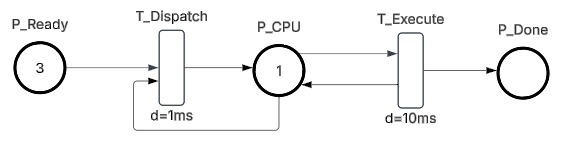

In [6]:

def run_cpu_example(cp):
          # Define the places
  P_Ready = Place("P_Ready", tokens=3)  # 3 tasks waiting
  P_CPU = Place("P_CPU", tokens=1)      # CPU is initially free
  P_Done = Place("P_Done", tokens=0)    # No tasks completed yet

  # Define the transitions
  T_Dispatch = CombinedTransition(
      name="T_Dispatch",
      input_places={P_Ready: 1, P_CPU: 1},  # Takes 1 task and 1 CPU token
      output_places={P_CPU: 1},             # Returns CPU token after dispatch
      fixed_delay=1.0,                      # 1ms delay
      burst_size=1,
      deterministic=True
  )

  T_Execute = CombinedTransition(
      name="T_Execute",
      input_places={P_CPU: 1},              # Takes 1 CPU token
      output_places={P_Done: 1, P_CPU: 1},  # Produces 1 done task and frees CPU
      fixed_delay=10.0,                     # 10ms delay
      burst_size=1,
      deterministic=True
  )

  # Create the Petri net
  petri_net = PetriNet(
      places=[P_Ready, P_CPU, P_Done],
      transitions=[T_Dispatch, T_Execute]
  )

  # Run the simulation for 50ms
  petri_net.simulate(max_time=cp)


print("RUNNING CPU EXAMPLE")
run_cpu_example(50)

RUNNING CPU EXAMPLE
Scheduled regular event for 'T_Dispatch' at time 1.000
Scheduled regular event for 'T_Execute' at time 10.000

--- At time 1.000 ---
Transition 'T_Dispatch' fired.
Place(name='P_Ready', tokens=2)
Place(name='P_CPU', tokens=1)
Place(name='P_Done', tokens=0)
Scheduled regular event for 'T_Dispatch' at time 2.000

--- At time 2.000 ---
Transition 'T_Dispatch' fired.
Place(name='P_Ready', tokens=1)
Place(name='P_CPU', tokens=1)
Place(name='P_Done', tokens=0)
Scheduled regular event for 'T_Dispatch' at time 3.000

--- At time 3.000 ---
Transition 'T_Dispatch' fired.
Place(name='P_Ready', tokens=0)
Place(name='P_CPU', tokens=1)
Place(name='P_Done', tokens=0)
Transition 'T_Dispatch' not enabled (single check): P_Ready has 0 tokens, requires 1.

--- At time 10.000 ---
Transition 'T_Execute' fired.
Place(name='P_Ready', tokens=0)
Place(name='P_CPU', tokens=1)
Place(name='P_Done', tokens=1)
Scheduled regular event for 'T_Execute' at time 20.000
Transition 'T_Dispatch' not ena